<a href="https://colab.research.google.com/github/OrestisGeo/MSc_MachineLearning/blob/Exercise_1/ML_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Exercise 1**


Import Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# Part 1

Question 1:

In [ ]:
data = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(dataframe.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

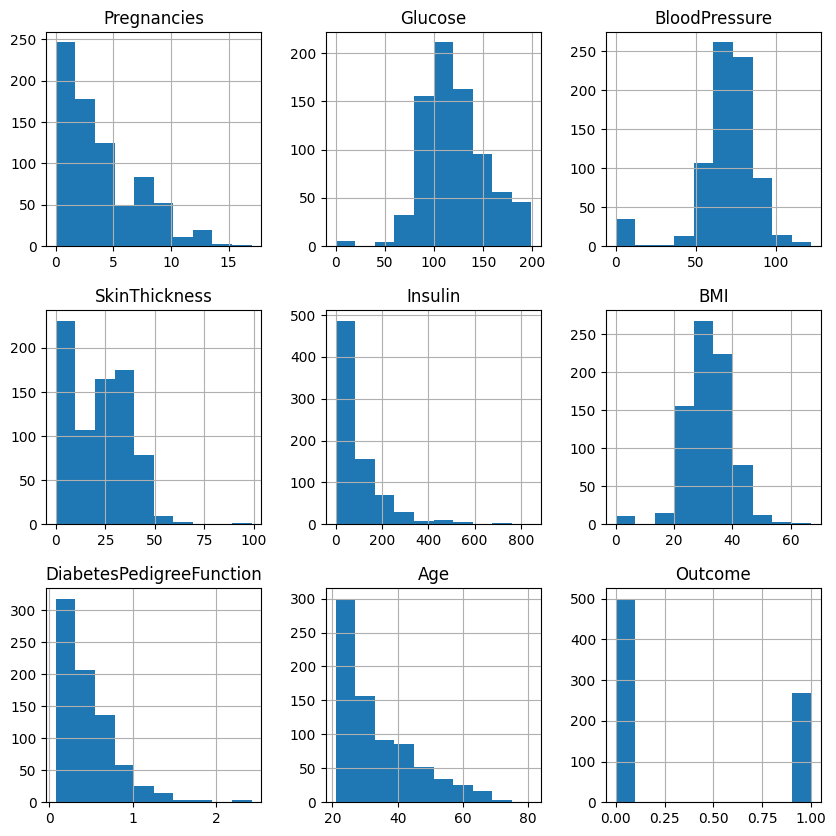

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

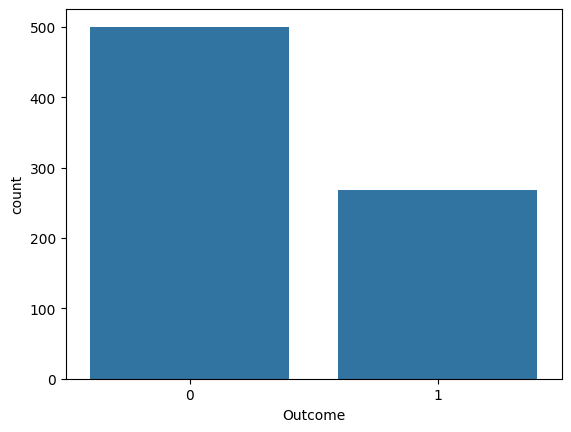

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.show()

Question 2:

Σύνολο μηδενικών τιμών σε κάθε ανεξάρτητη μεταβλητή του dataset:

In [ ]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Αρχικά παρατηρούμε ότι σε όλες σχεδόν τις ανεξάρτητες μεταβλητές έχουμε κάποιες μηδενικές τιμές. Σε ορισμένες από αυτές δεν μας ενοχλούν(όπως πχ Pregnacies) γιατί το μηδέν είναι μια αποδεκτή τιμή. Σε άλλες όμως όπως Blood Pressure, Skin Thickness, Insulin και BMI οι μηδενικές τιμές δεν είναι αποδεκτές.
Εδώ θα χρειαστεί να γίνει κάποιου είδους επεξεργασία των δεδομένων για να μην επηραστεί αρνητικά το μοντέλο μας.

Μια ακόμα παρατήρηση από τα ιστογράμματα είναι ότι υπάρχει πολύ μεγάλη αντιπροσώπευση στις μικρότερες ηλικίες 20-30. Ενώ τα υπόλοιπα δεδομένα φαίνεται να έχουν μια πιο φυσιολοφική κατανομή σε σχέση με το πρόβλημα που θέλουμε να λύσουμε, η ηλικία αποτελεί πρόβλημα. Αυτό γιατί είναι γνωστό ότι ο διαβήτης εμφανίζεται συχνότερα σε μεγαλύτερες ηλικίες, επομένως εδώ βλέπουμε ένα bias προς τις μικρότερες ηλικίες.

Όσων αφορά τις μηδενικές τιμές πιστεύω ότι μόνο σε 2 μεταβλητές (Skin Thickness και Insulin) είναι αρκετές σε σχέση με το συνολικό δείγμα ώστε να είναι ικανές να επηρεάσουν αρνητικά την εκπαίδευση του μοντέλου μας. Στις άλλες μεταβλητές οι μηδενικές τιμές είναι πολύ λίγες και δεν θεωρώ ότι αποτελούν πρόβλημα.
Πολύ πιο σημαντικό πιστεύω ότι είναι το bias του dataset προς τις μικρότερες ηλικίες.
Για αυτό κυρίως τον λόγο θα έλεγα ότι τα δεδομένα μας δεν είναι ιδανικά για το πρόβλημα που έχουμε να λύσουμε.


Question 3:
Η κατανομή της ανεξάρτητης μεταβλητής Age μοιάζει περισσότερο με μια δεξιά-ασύμετρη κατανομή. Όπως ανέφερα και στο προηγούμενο ερώτημα, υπάρχει μια συγκέντρωση των τιμώς στις μικρότερες ηλικίες 23-43 καθώς η μέση τιμή είναι 33 με τυπική απόκλιση τα 11 χρόνια.
Η κατανομή αυτή δεν είναι καλή για την συγκεκριμένη εφαρμόγή καθώς είναι γνωστό ότι η πιθανότητα να εμφανίσει κάποιος διαβήτη μεγαλώνει με την αύξηση της ηλικίας. Η ιδανική κατανομή ηλικιών για την συγκεκριμένη εφαρμογή θα ήταν η κανονική κατανομή.

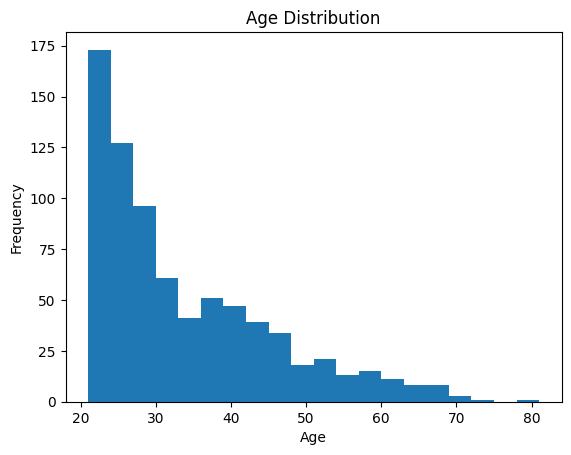

In [ ]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Question 4:

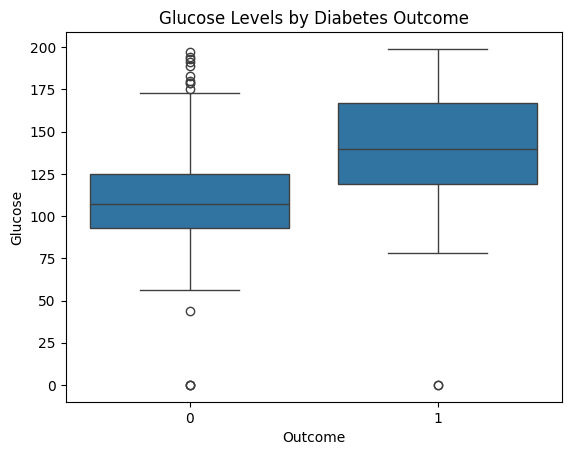

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

In [ ]:
mean_glucose_diabetes = df.groupby('Outcome')['Glucose'].mean()
print(mean_glucose_diabetes)


Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


In [ ]:
df["Glucose"].corr(df["Outcome"])

np.float64(0.46658139830687295)

In [ ]:
mean_glucose_diabetes = df.groupby('Outcome')['Glucose'].mean()
print(mean_glucose_diabetes)

Παρατηρούμε στο boxplot ότι οι τιμές γλυκόζης για τα άτομα με και χωρίς διαβήτη είναι πολύ διαφορετικές, το ίδιο και οι μέσες τιμές τους.
Επίσης βλέπουμε ότι ο συντελεστής συσχέτισης είναι 0.46 που μας δείχνει μια μέτρια προς καλή συσχέτιση μεταξύ τους.

Question 5:

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f"Training examples: {len(X_train)}")
print(f"Validation examples: {len(X_test)}")

Training examples: 537
Validation examples: 231


Training examples: 537
Validation examples: 231


Question 6:

In [ ]:
model = LogisticRegression(random_state=0, max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [ ]:
# prediction on X_test (test set)
y_pred = model.predict(X_test)
# accuracy at test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.7792207792207793


Παρατηρούμε ότι έχουμε ακρίβεια σχεδόν 78% το οποίο σημαίνει οτι η μεγάλη πλειοψηφία έχει ταξινομηθεί σωστά.

In [ ]:
# Accuracy at train set
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print(f"Train set accuracy: {train_acc}")

Train set accuracy: 0.7653631284916201


Η ακρίβεια στο test set είναι περίπου 1.5% μεγαλύτερη από αυτή του test set.
Επομένως το μοντέλο φαίνεται να δουλεύει καλά.

Question 7:

In [ ]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])
df['AgeGroup'] = age_groups
accuracy_per_age = df.groupby('AgeGroup', observed=True)['Outcome'].mean()
print(f"Accuracy per age: {accuracy_per_age}")

Accuracy per age: AgeGroup
0-25     0.168539
25-50    0.440476
>50      0.469136
Name: Outcome, dtype: float64


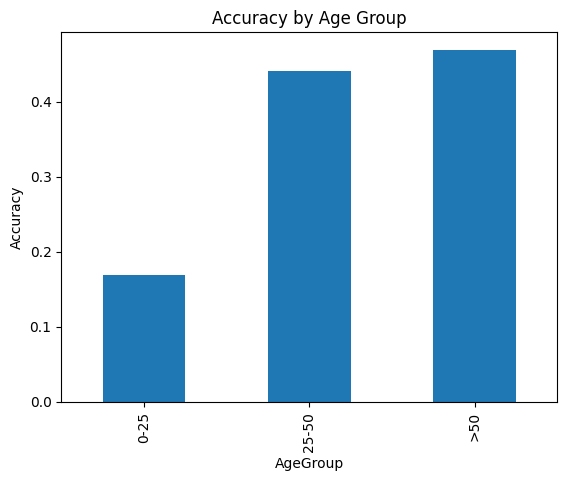

In [ ]:
accuracy_per_age.plot(kind='bar')
plt.title('Accuracy by Age Group')
plt.ylabel('Accuracy')
plt.show()

Question 8:

Γενικά είναι πιο σημαντικό να ανιχνεύονται οι ασθενείς που είναι πραγματικά θετικοί στον διαβήτη (αληθώς θετικά). Τα ψευδώς θετικά, δηλαδή οι ασθενείς που ανιχνεύονται θετικοί ενώ δεν έχουν διαβήτη, επιβαρύνουν μεν το σύστημα υγείας με περιττά έξοδα αλλά δεν είναι επικίνδυνα για την υγεία του ασθενή.

Ο στόχος είναι να ελαχιστοποιηθούν τα ψευδώς αρνητικά, δηλαδή οι περιπτώσεις όπου ο ασθενής έχει διαβήτη αλλά δεν ανιχνεύεται. Αυτές είναι οι περιπτώσεις όπου η υγεία του ασθενή βρίσκεται σε κίνδυνο.

Question 9:

In [ ]:
accuracies = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Accuracies: {accuracies}")

Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]


In [ ]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean accuracy: {mean_accuracy}, Standard deviation: {std_accuracy}")

Mean accuracy: 0.7735930735930736, Standard deviation: 0.019364735278220815


Παρατηρούμε ότι έχουμε μια αρκετά καλή απόδοση 77%, με ταυτόχρονα μικρή τυπική απόκλιση των αποτελεσμάτων.

Question 10:


In [ ]:
df.dtypes


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64
AgeGroup,category


In [ ]:
X = df.drop(['Outcome', 'AgeGroup'], axis=1)
y = df["Outcome"]

#Min–Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, random_state=0)
model.fit(X_scaled, y)

LogisticRegression(max_iter=2000, random_state=0)

In [ ]:
# Coefficient calculation
coef = pd.Series(model.coef_[0], index=X.columns)
coef_sorted = coef.abs().sort_values(ascending=False)
print(coef_sorted.head(3))

Glucose        4.856010
BMI            3.261590
Pregnancies    1.554917
dtype: float64


Παρατηρούμε ότι οι 3 πιο σημαντικές μεταβλητές που επηρεάζουν την πρόγνωση διαβήτη με βάση το μοντέλο μας είναι τα επίπεδα γλυκόζης στο αίμα, ο δείκτης BMI, και ο αριθμός των εγκυμοσύνων.
Ο πιο σημαντικός παράγοντας είναι τα επίπεδα γλυκόζης με συντελεστή 4.85. Το αποτέλεσμα αυτό είναι αυτό που θα περιμέναμε με βάση την ιατρική επιστήμη.

# **Part 2**

Question 1:

In [ ]:
# Remove AgeGroup
df.drop('AgeGroup', axis=1, inplace=True)

In [ ]:
X = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"Training examples: {len(X_train)}")
print(f"Validation examples: {len(X_test)}")

Training examples: 537
Validation examples: 231


Question 2:

In [ ]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 929.8883492746899
Mean Absolute Error (MAE): 23.599990462075155


Στο πρόβλημά που έχουμε το MAE είναι πιο κατάλληλη μετρική. Αυτό ισχύει γιατί μας ενδιαφέρει περισσότερο η πραγματική απόσταση της πρόβλεψης που κάναμε από την πραγματική τιμή της Ινσουλίνης. Άρα στο παράδειγμά μας οι τιμές που υπολογίζουμε απέχουν κατά μέσο όρο περίπου 80 μονάδες από την πραγματική τιμή της Ινσουλίνης.
Η μετρίκη MSE δίνει πολύ μεγαλύτερο βάρος στις ακραίες τιμές, και αυτό δεν είναι κάτι που μας ενδιαφέρει στο πρόβλημά μας.

Question 3:

In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_accuracies = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    lasso_accuracies.append(mae)

lasso_results = pd.DataFrame({
    'Alpha': alphas,
    'Mean Absolute Error': lasso_accuracies
})

In [ ]:
print(lasso_results)

   Alpha  Mean Absolute Error
0    0.2            23.594203
1    0.4            23.588415
2    0.6            23.582629
3    0.8            23.576843
4    1.0            23.571058


Βλέπουμε ότι όσο μεγαλώνει το βάρος λ το MAE έχει μια αμελητέα μείωση και ουσιαστικά παραμένει το ίδιο. Άρα συμπεραίνουμε ότι η κανονικοποίηση που κάναμε δεν επηρεάζει το αποτέλεσμά μας.

Question 4:

In [ ]:
X = df[["Pregnancies", "BloodPressure", "BMI", "Age"]]
y = df["Glucose"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

coeffs = model.coef_
features = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']

for f, c in zip(features, coeffs):
    print(f"{f}: {c:.4f}")

Pregnancies: -3.2024
BloodPressure: 7.3953
BMI: 54.8908
Age: 42.1215


In [ ]:
min_feature = features[np.argmin(np.abs(coeffs))]
print(f"Feature with less importance: {min_feature}")


Feature with less importance: Pregnancies


In [ ]:
# Remove the feature of less importance
X_reduced = X.drop(columns=[min_feature])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred2)

print(f"New MAE, excluding the less important feature '{min_feature}': {mae2:.4f}")

New MAE, excluding the less important feature 'Pregnancies': 23.5876


Παρατηρούμε ότι αφαιρώντας την μεταβλητή με τον μικρότερο συντελεστή, ο MAE είναι 23.58 σε σύγκριση με το 23.57 που είχαμε προηγουμένως.

Επομένως ο MAE δεν αλλάζει όπως είναι αναμμενόμενο μιας και η μεταβλητή με μικρή βαρύτητα δεν επηρεάζει σχεδόν καθόλου τα επίπεδα γλυκόζης.